In [2]:
# look at the sensitivity analysis results
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

# numrows = 100000
pd.set_option('display.max_columns', None)
results = pd.read_csv('../../HDSAviz_data/results.csv')#, nrows=numrows)
params = pd.read_csv('../../HDSAviz_data/input_parameters.csv')#, nrows=numrows)
# These two functional groups aren't present in light oils...
results.drop(['light_aromatic_C-C', 'light_aromatic_methoxyl'], axis=1,
             inplace=True)
# These parameters are not part of the sensitivity analysis
params.drop(['End_time', 'Oxygen'], axis=1, inplace=True)
comb = pd.concat([params, results], axis=1)

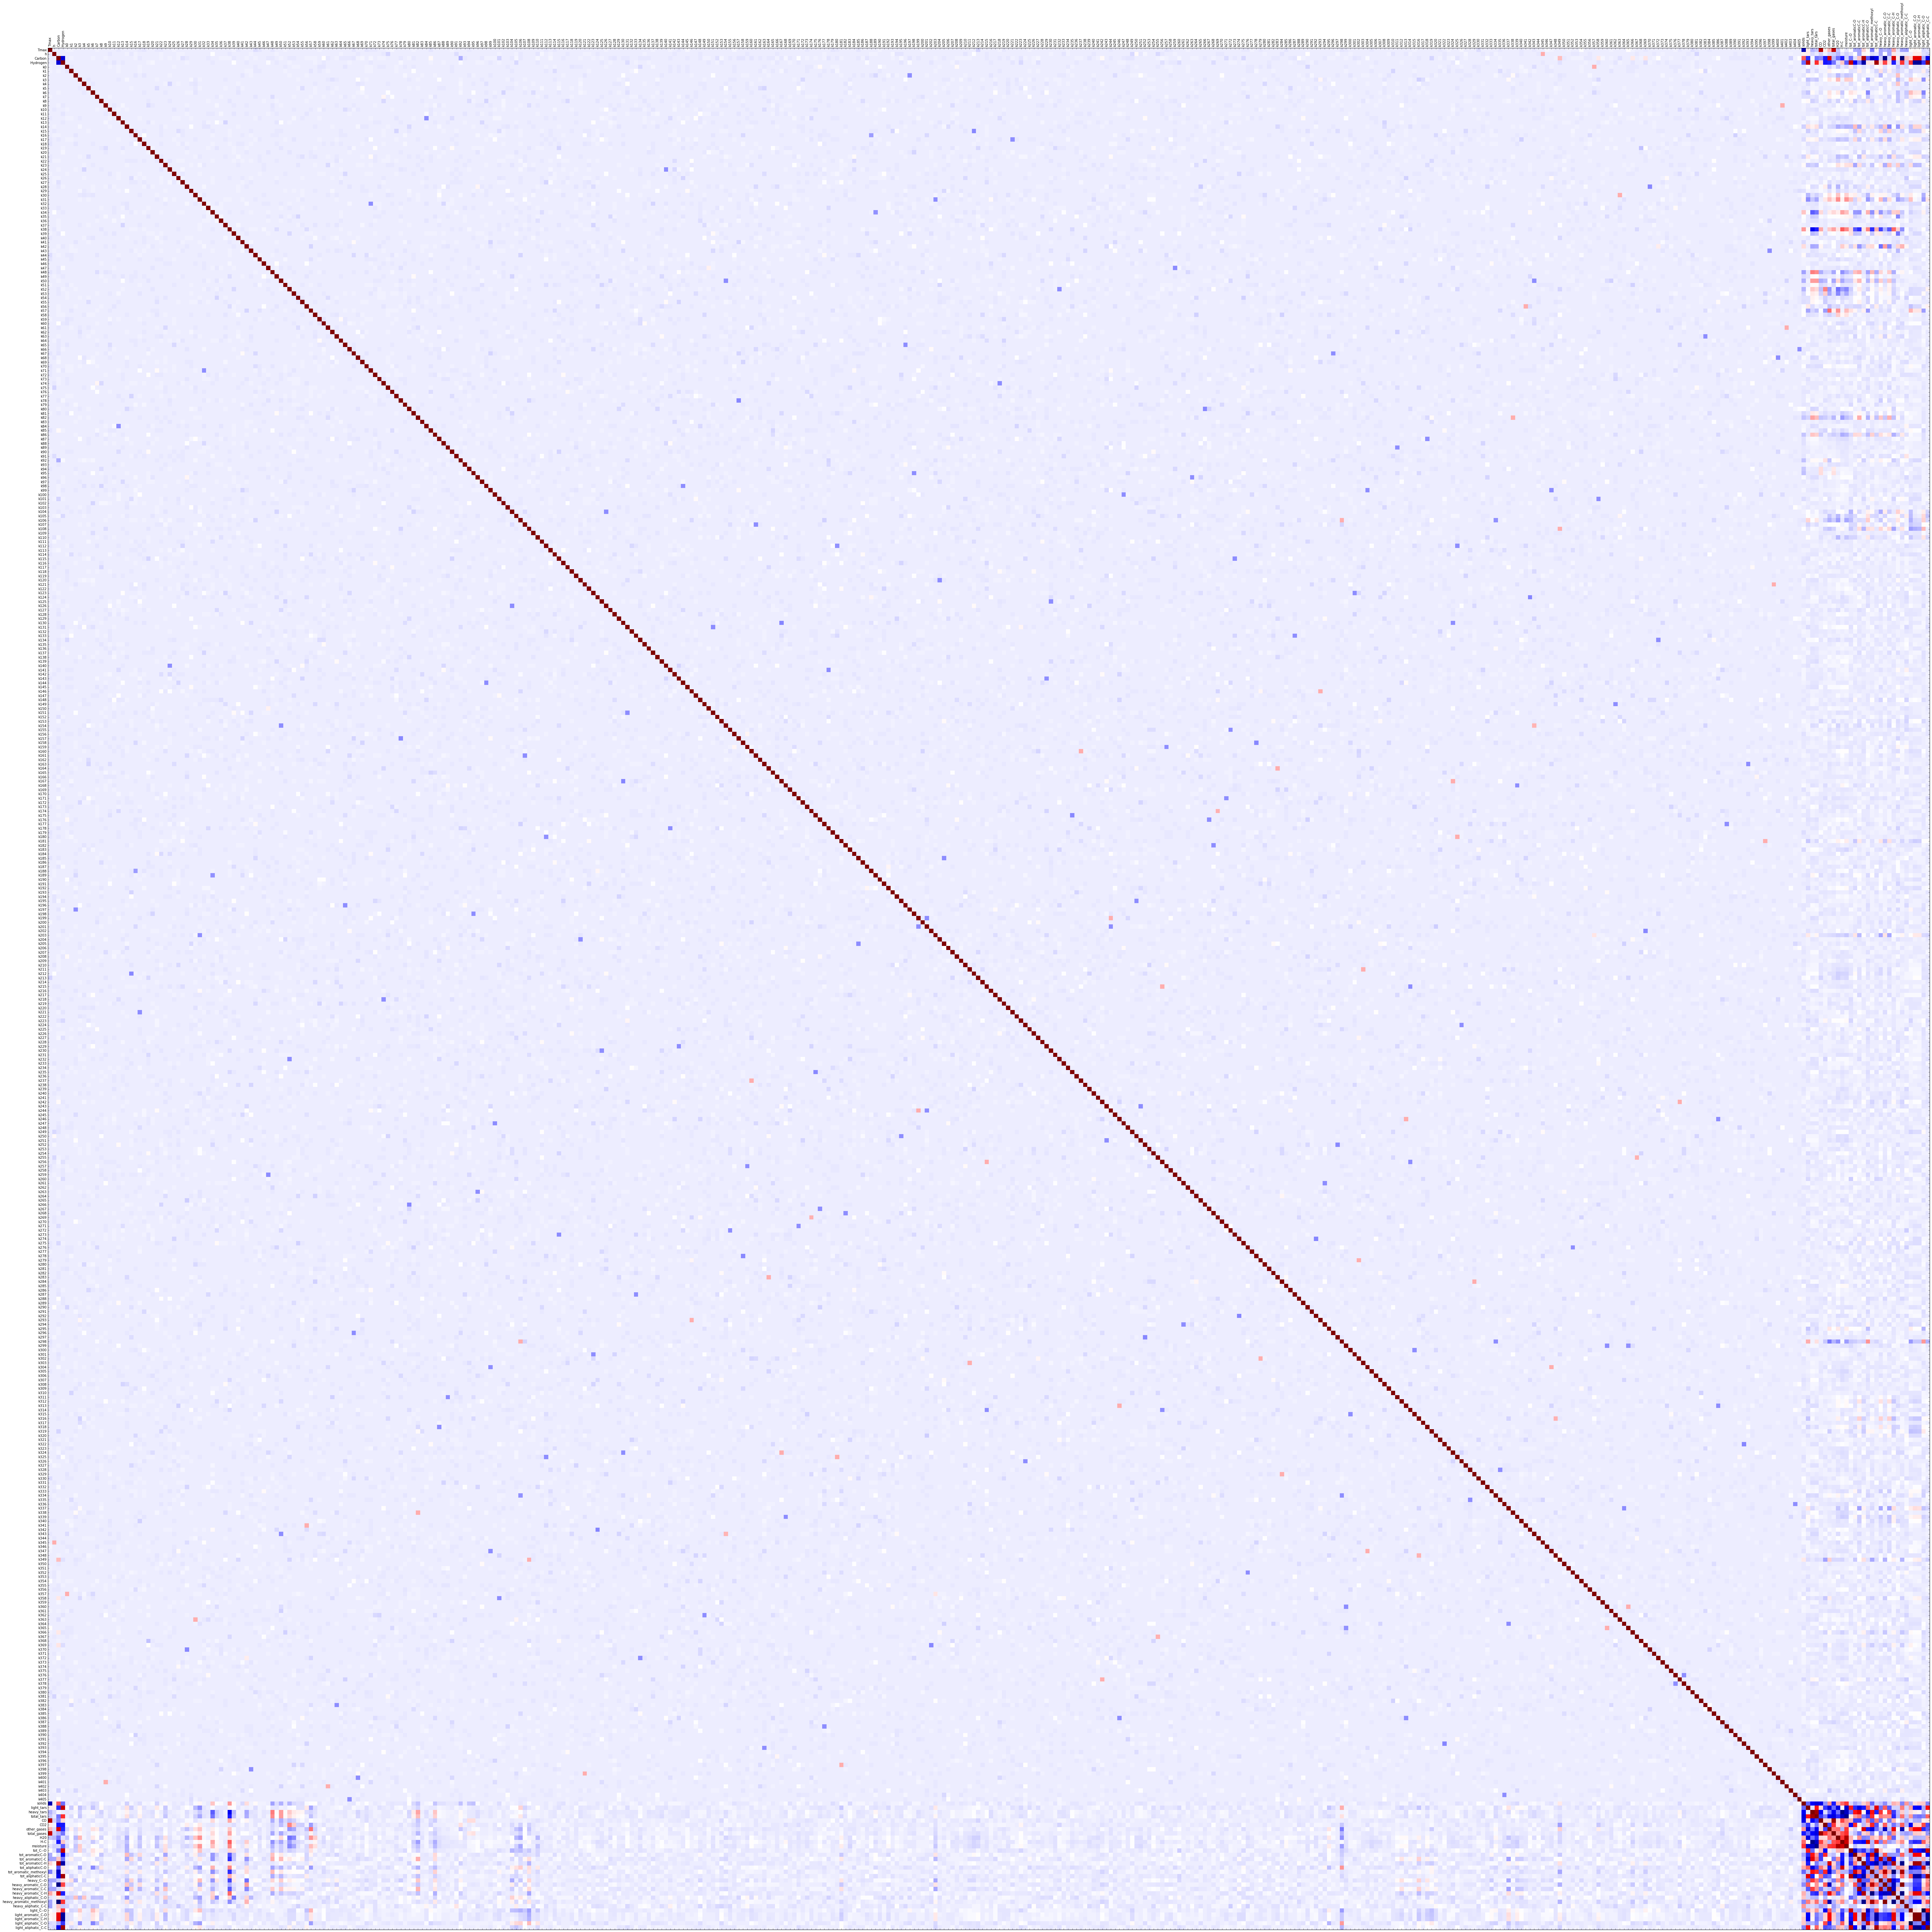

In [3]:
def plot_corr(df, method='spearman', size=10, window=None):
    '''Plots a graphical correlation matrix for each
       pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        window: the range of the plot that you want to show
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    # blue is negative values, red is positive values, white ~0
    ax.matshow(corr, cmap='seismic')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    if window is not None:
        plt.axis(window)
    plt.savefig('correlation_matrix-%s.pdf' % (method), bbox_inches = 'tight')

plot_corr(comb, size=100)#, window=[0, 409, 410, 440])